In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

%inline matplotlib

UsageError: Line magic function `%inline` not found.


In [2]:
dataset = "../data/data.csv"

df = pd.read_csv(dataset)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#drop id column

df.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 32', axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.isin([0]).sum()

df['concavity_mean'].replace(0, df['concavity_mean'].mean(), inplace=True)
df['concave points_mean'].replace(0, df['concave points_mean'].mean(), inplace=True)
df['concavity_se'].replace(0, df['concavity_se'].mean(), inplace=True)
df['concave points_se'].replace(0, df['concave points_se'].mean(), inplace=True)
df['concavity_worst'].replace(0, df['concavity_worst'].mean(), inplace=True)
df['concave points_worst'].replace(0, df['concave points_worst'].mean(), inplace=True)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
print(df['diagnosis'].value_counts())
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})
df.head()

diagnosis
B    357
M    212
Name: count, dtype: int64


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

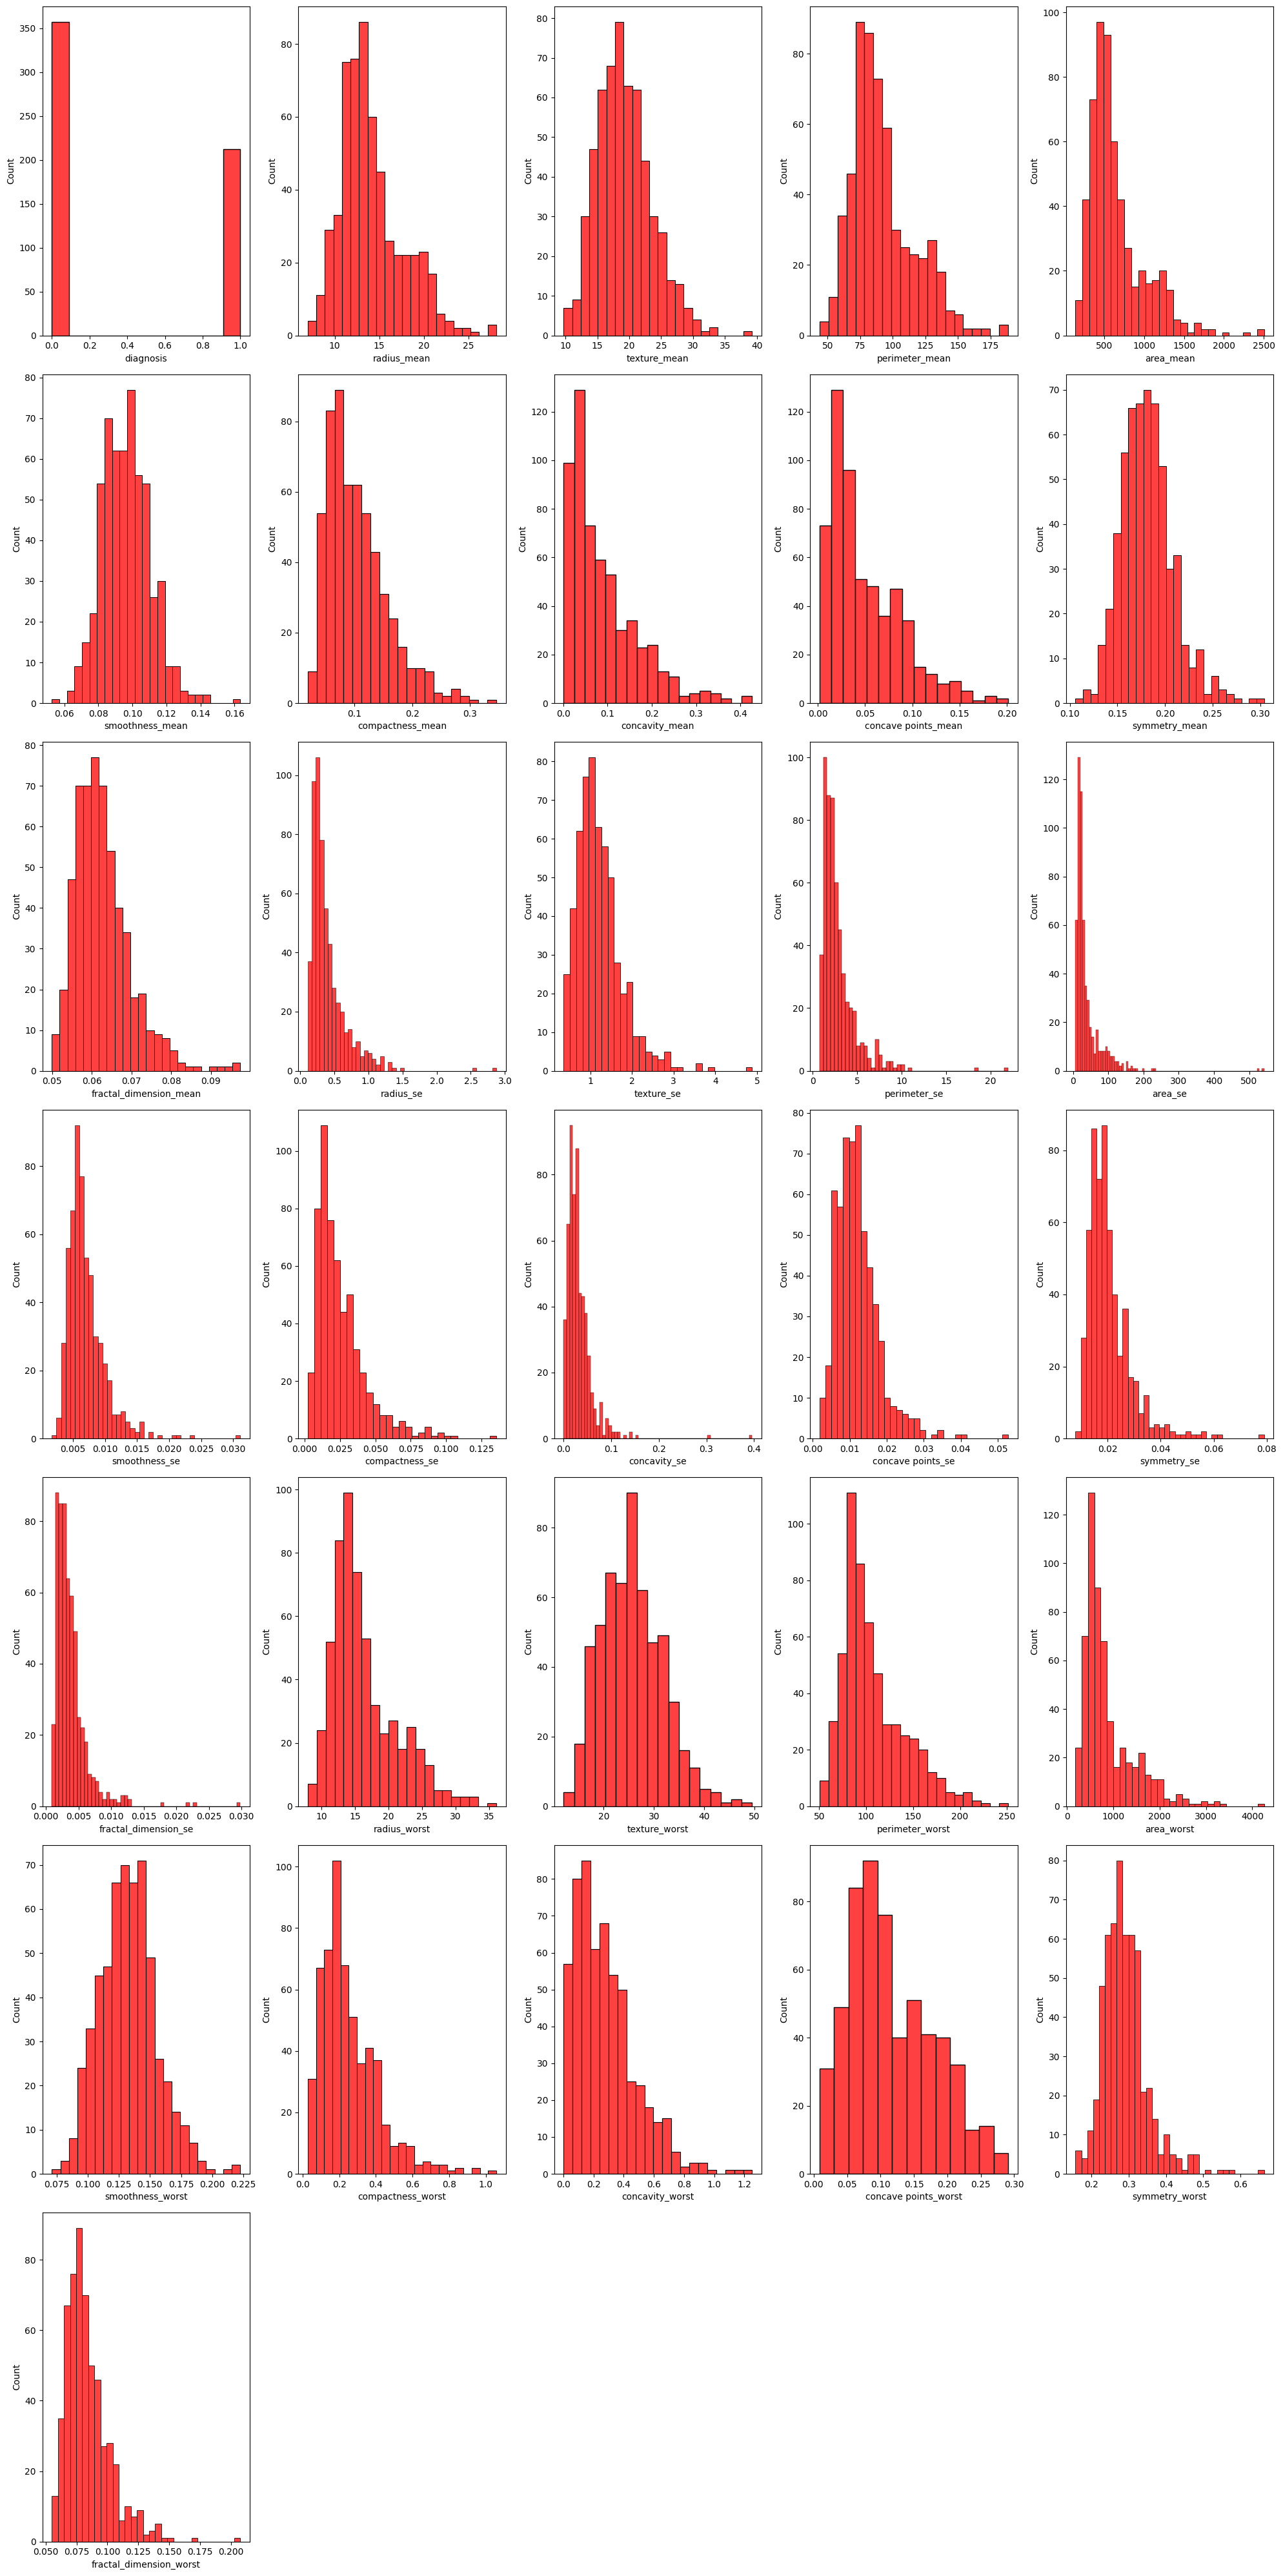

In [8]:
plt.figure(figsize = (20, 40))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 31:
        ax = plt.subplot(7, 5, plotnumber)
        sns.histplot(df[column],color='red',)
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [9]:
train, test = train_test_split(df, test_size=0.4, random_state=28)
train, validation = train_test_split(df, test_size=0.1, random_state=28)

print(f"Train set has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"Test set has {test.shape[0]} rows and {test.shape[1]} columns")
print(f"Validation set has {validation.shape[0]} rows and {validation.shape[1]} columns")
test.head()

Train set has 512 rows and 31 columns
Test set has 228 rows and 31 columns
Validation set has 57 rows and 31 columns


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
15,1,14.54,27.54,96.73,658.8,0.11390,0.15950,0.163900,0.073640,0.2303,...,17.46,37.13,124.10,943.2,0.16780,0.65770,0.702600,0.171200,0.4218,0.13410
247,0,12.89,14.11,84.95,512.2,0.08760,0.13460,0.137400,0.039800,0.1596,...,14.39,17.70,105.00,639.1,0.12540,0.58490,0.772700,0.156100,0.2639,0.11780
174,0,10.66,15.15,67.49,349.6,0.08792,0.04302,0.088799,0.048919,0.1928,...,11.54,19.20,73.20,408.3,0.10760,0.06791,0.272188,0.114606,0.2710,0.06164
228,0,12.62,23.97,81.35,496.4,0.07903,0.07529,0.054380,0.020360,0.1514,...,14.20,31.31,90.67,624.0,0.12270,0.34540,0.391100,0.118000,0.2826,0.09585
561,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.088799,0.048919,0.1060,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.272188,0.114606,0.1566,0.05905


In [10]:
le = LabelEncoder()

for col in cat_cols:
    train[col] = le.fit_transform(train[col])
    validation[col] = le.transform(validation[col])
    test[col] = le.transform(test[col])

X_train = train.drop('diagnosis', axis=1)
y_train = train['diagnosis']

X_test = test.drop('diagnosis', axis=1)
y_test = test['diagnosis']

X_validation = validation.drop('diagnosis', axis=1)
y_validation = validation['diagnosis']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)

In [11]:
def run_model(model, X_train, y_train, X_test, y_test, X_validation, y_validation):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model = {model}")
    print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
    print(f"Precision score: {sklearn.metrics.precision_score(y_test, y_pred)}")
    print(f"Recall score: {sklearn.metrics.recall_score(y_test, y_pred)}")
    print(f"F1 score: {sklearn.metrics.f1_score(y_test, y_pred)}")
    print(f"Validation score: {model.score(X_validation, y_validation)}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap='magma')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    print()

In [12]:
from sklearn.utils import all_estimators

all_estimators

models = []

for name, model in all_estimators(type_filter='classifier'):
    models.append(model)

models

[sklearn.ensemble._weight_boosting.AdaBoostClassifier,
 sklearn.ensemble._bagging.BaggingClassifier,
 sklearn.naive_bayes.BernoulliNB,
 sklearn.calibration.CalibratedClassifierCV,
 sklearn.naive_bayes.CategoricalNB,
 sklearn.multioutput.ClassifierChain,
 sklearn.naive_bayes.ComplementNB,
 sklearn.tree._classes.DecisionTreeClassifier,
 sklearn.dummy.DummyClassifier,
 sklearn.tree._classes.ExtraTreeClassifier,
 sklearn.ensemble._forest.ExtraTreesClassifier,
 sklearn.naive_bayes.GaussianNB,
 sklearn.gaussian_process._gpc.GaussianProcessClassifier,
 sklearn.ensemble._gb.GradientBoostingClassifier,
 sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
 sklearn.neighbors._classification.KNeighborsClassifier,
 sklearn.semi_supervised._label_propagation.LabelPropagation,
 sklearn.semi_supervised._label_propagation.LabelSpreading,
 sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
 sklearn.svm._classes.LinearSVC,
 sklearn.linear_model._logistic.Logi

Model = AdaBoostClassifier()
Accuracy score: 0.9868421052631579
Precision score: 0.975609756097561
Recall score: 0.9876543209876543
F1 score: 0.9815950920245398
Validation score: 0.9473684210526315


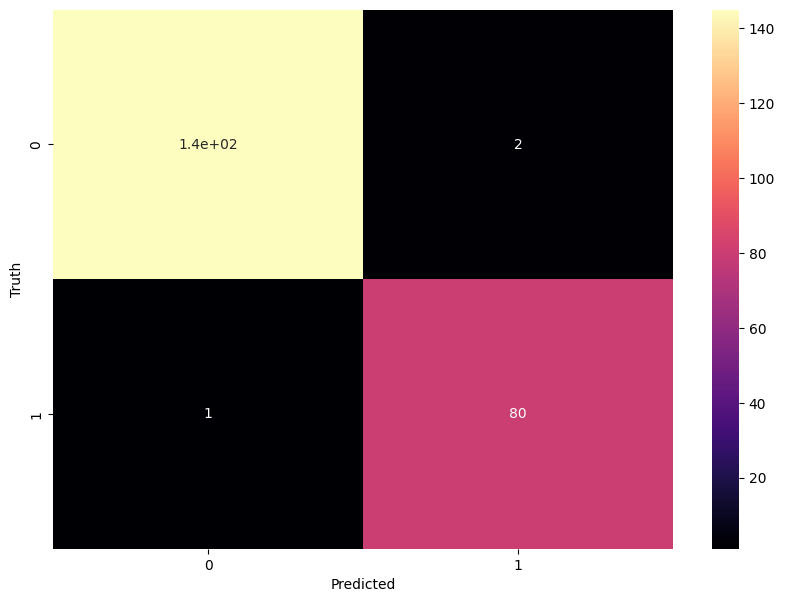


Model = BaggingClassifier()
Accuracy score: 0.9692982456140351
Precision score: 0.9512195121951219
Recall score: 0.9629629629629629
F1 score: 0.9570552147239264
Validation score: 0.8771929824561403


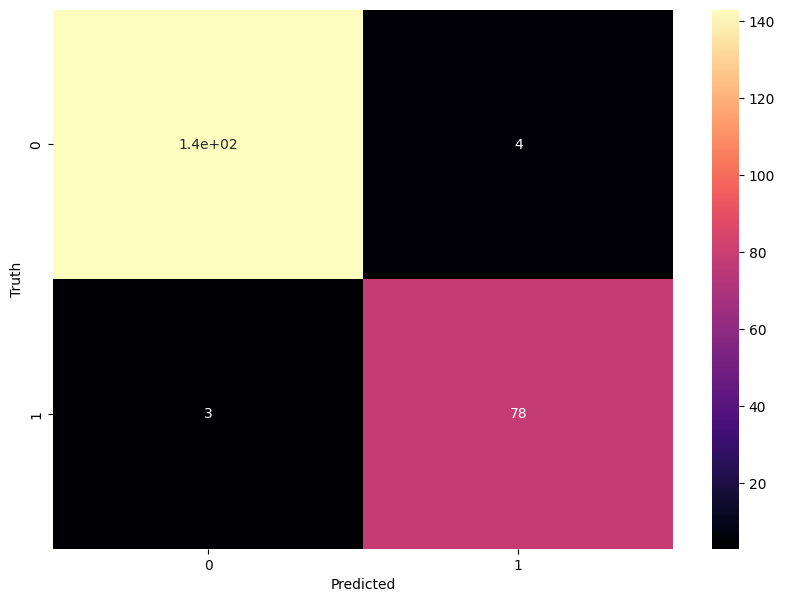


Model = BernoulliNB()
Accuracy score: 0.9210526315789473
Precision score: 0.8620689655172413
Recall score: 0.9259259259259259
F1 score: 0.8928571428571429
Validation score: 0.8947368421052632


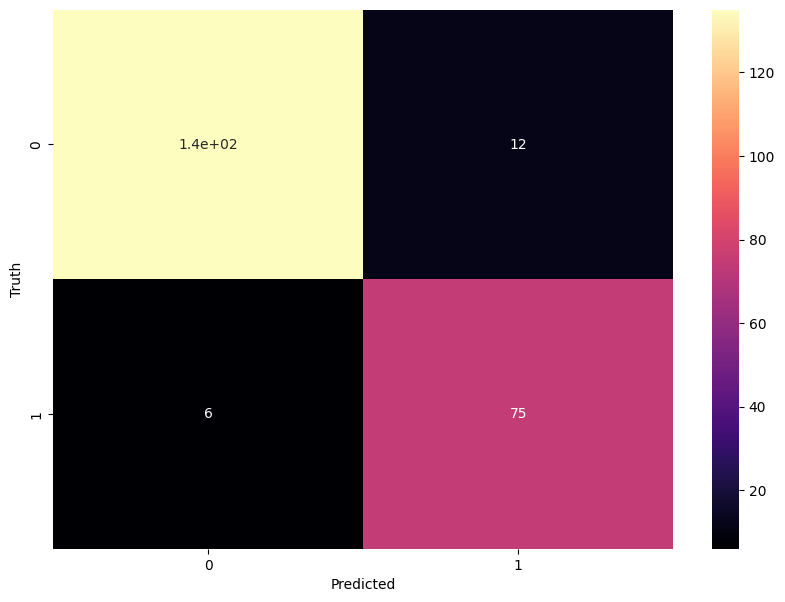


Model = CalibratedClassifierCV()
Accuracy score: 0.9780701754385965
Precision score: 1.0
Recall score: 0.9382716049382716
F1 score: 0.9681528662420382
Validation score: 0.9649122807017544


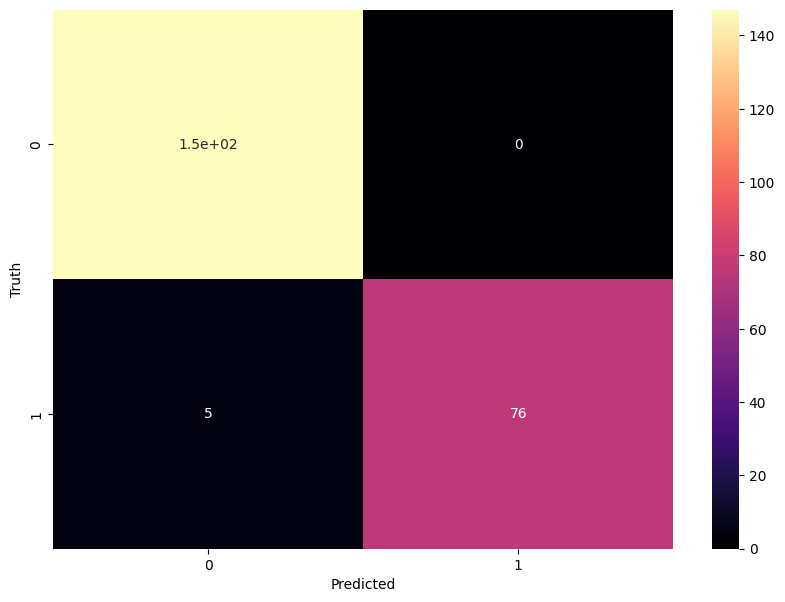


Model = DecisionTreeClassifier()
Accuracy score: 0.9736842105263158
Precision score: 0.9629629629629629
Recall score: 0.9629629629629629
F1 score: 0.9629629629629629
Validation score: 0.8947368421052632


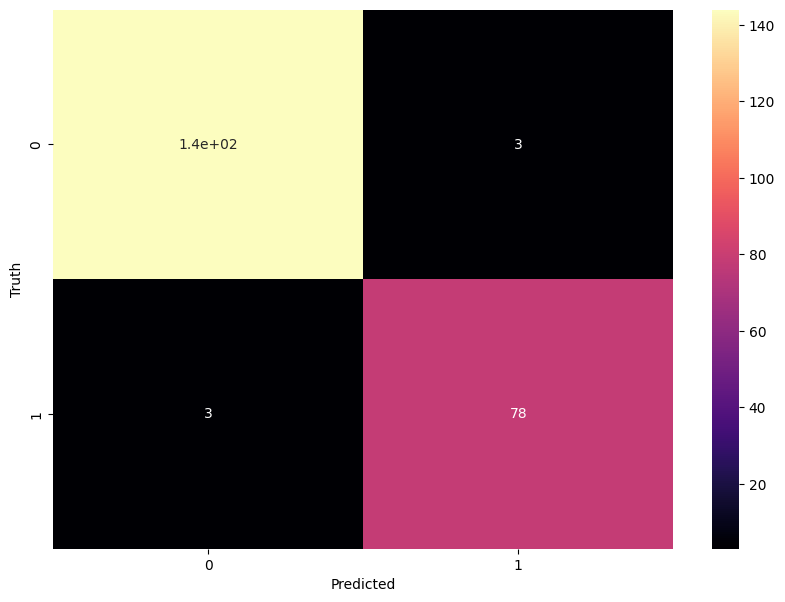


Model = DummyClassifier()
Accuracy score: 0.6447368421052632
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0
Validation score: 0.6140350877192983


/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


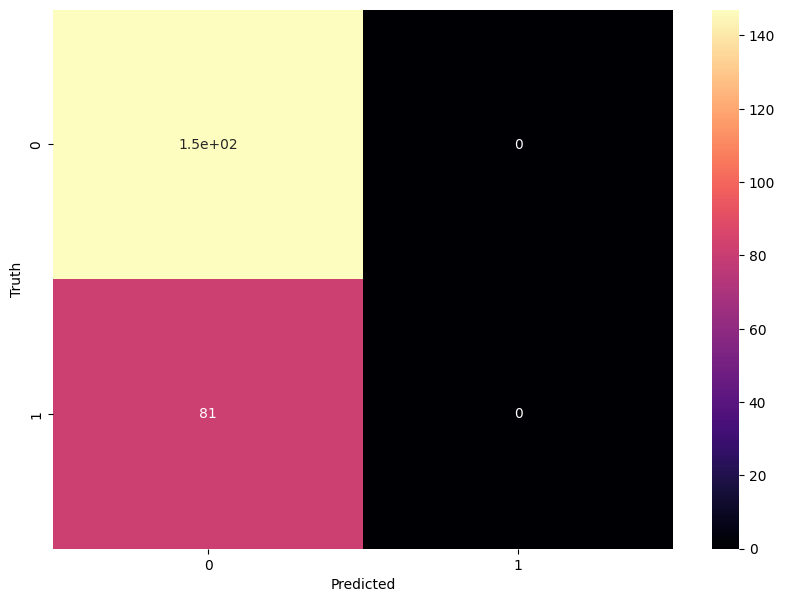


Model = ExtraTreeClassifier()
Accuracy score: 0.9824561403508771
Precision score: 0.9753086419753086
Recall score: 0.9753086419753086
F1 score: 0.9753086419753086
Validation score: 0.9298245614035088


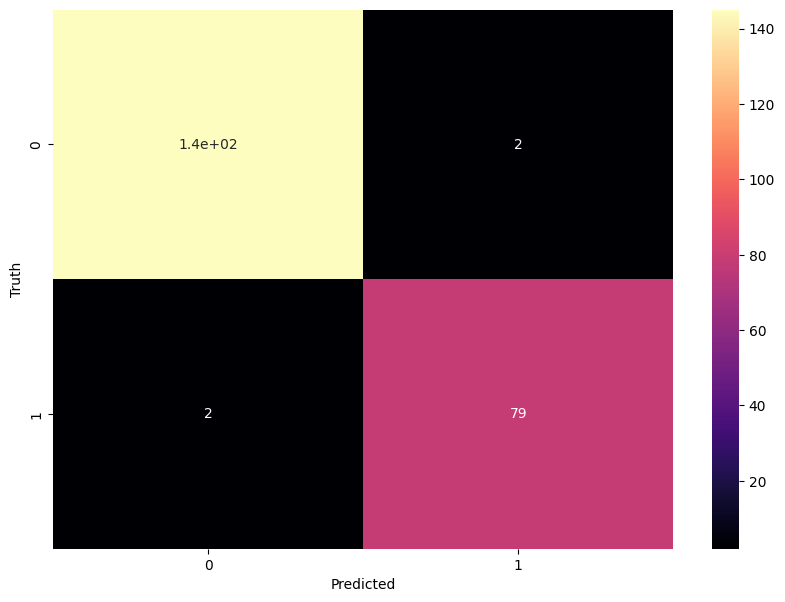


Model = ExtraTreesClassifier()
Accuracy score: 0.9868421052631579
Precision score: 0.975609756097561
Recall score: 0.9876543209876543
F1 score: 0.9815950920245398
Validation score: 0.9473684210526315


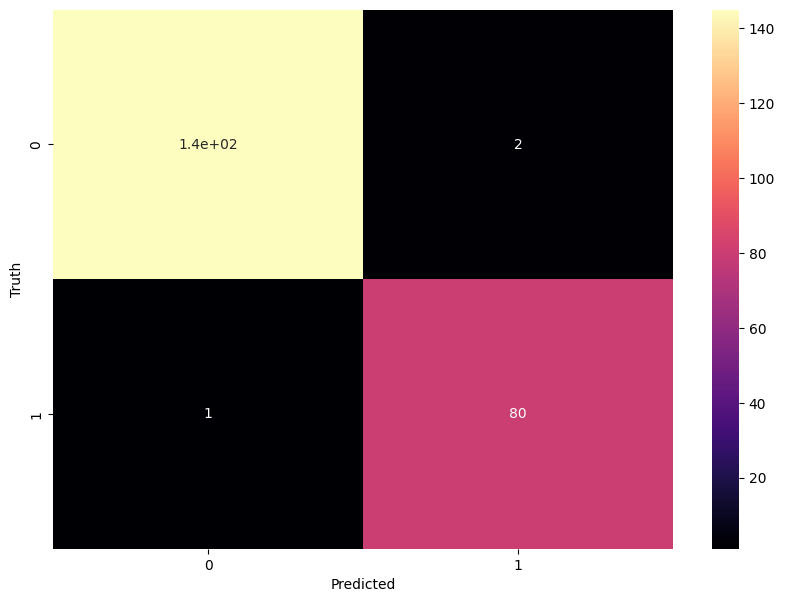


Model = GaussianNB()
Accuracy score: 0.9298245614035088
Precision score: 0.9012345679012346
Recall score: 0.9012345679012346
F1 score: 0.9012345679012346
Validation score: 0.8771929824561403


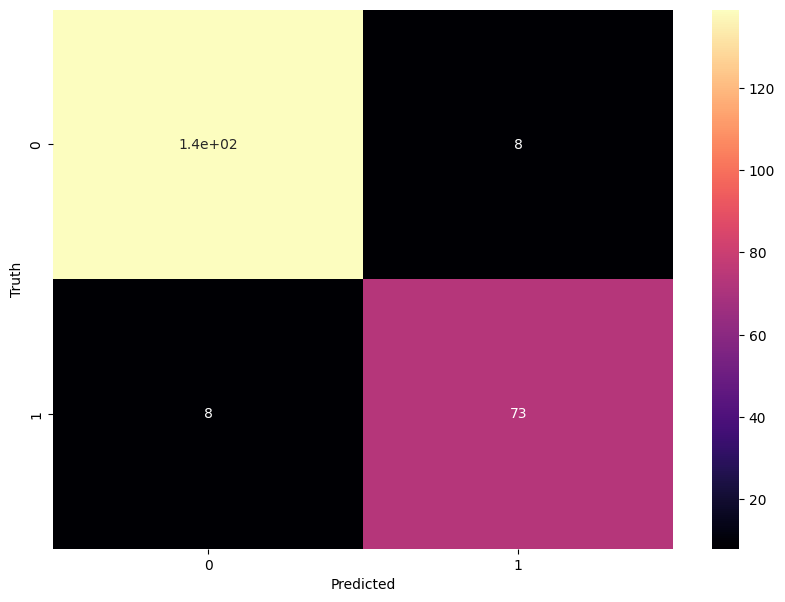


Model = GaussianProcessClassifier()
Accuracy score: 0.9912280701754386
Precision score: 0.9876543209876543
Recall score: 0.9876543209876543
F1 score: 0.9876543209876543
Validation score: 0.9649122807017544


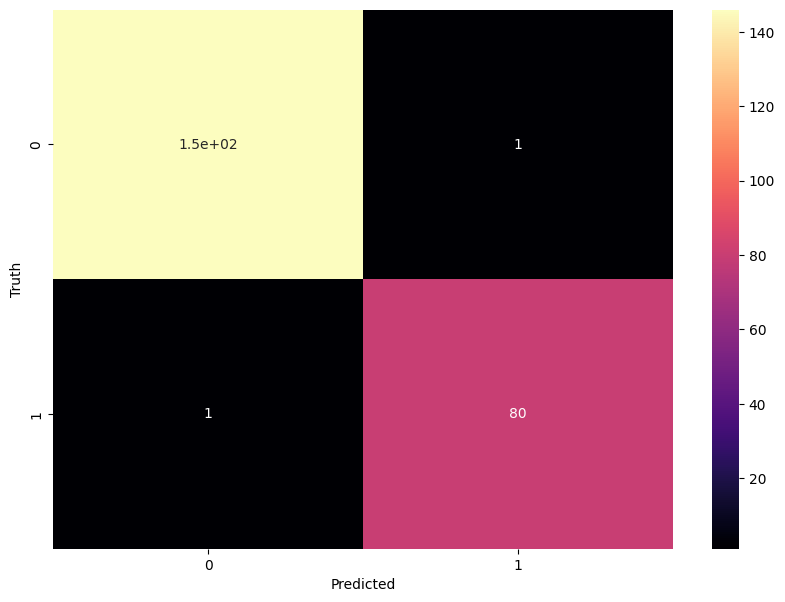


Model = GradientBoostingClassifier()
Accuracy score: 0.9780701754385965
Precision score: 0.975
Recall score: 0.9629629629629629
F1 score: 0.9689440993788819
Validation score: 0.9122807017543859


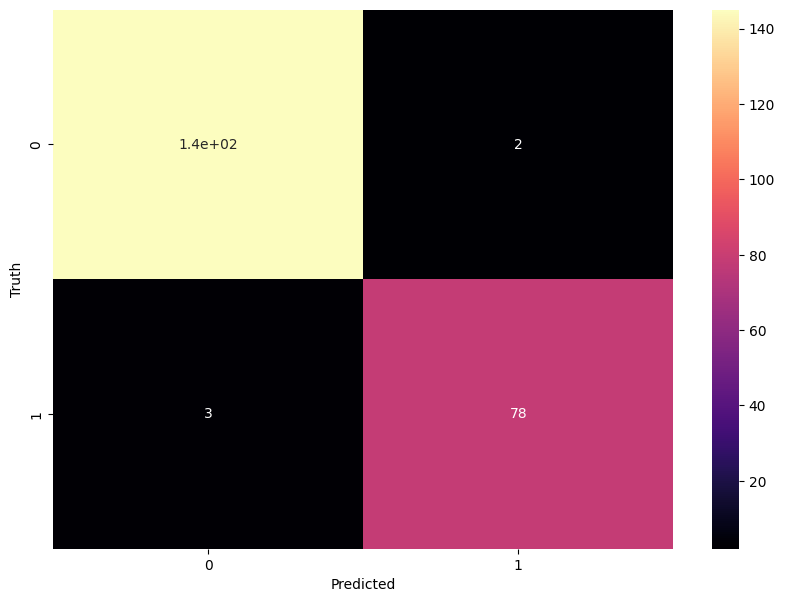


Model = HistGradientBoostingClassifier()
Accuracy score: 0.9824561403508771
Precision score: 0.9753086419753086
Recall score: 0.9753086419753086
F1 score: 0.9753086419753086
Validation score: 0.9298245614035088


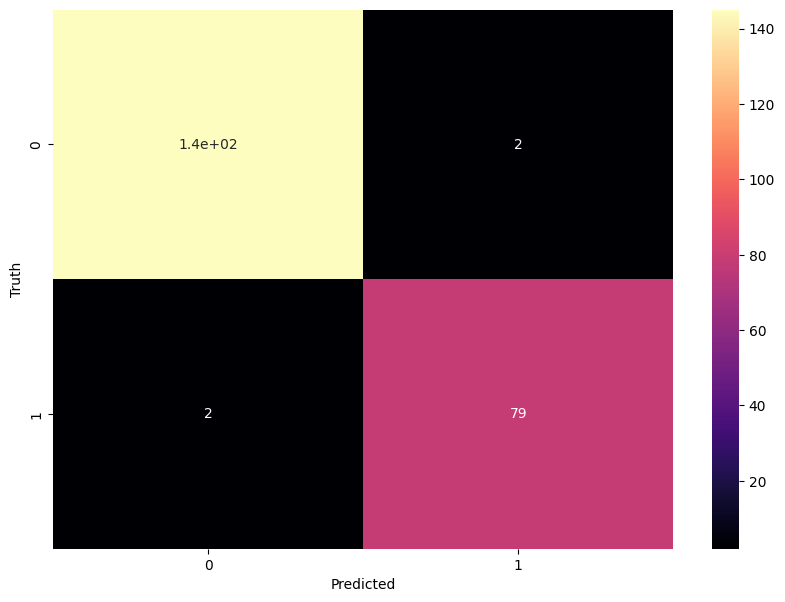


Model = KNeighborsClassifier()
Accuracy score: 0.9868421052631579
Precision score: 0.9875
Recall score: 0.9753086419753086
F1 score: 0.9813664596273292
Validation score: 0.9824561403508771


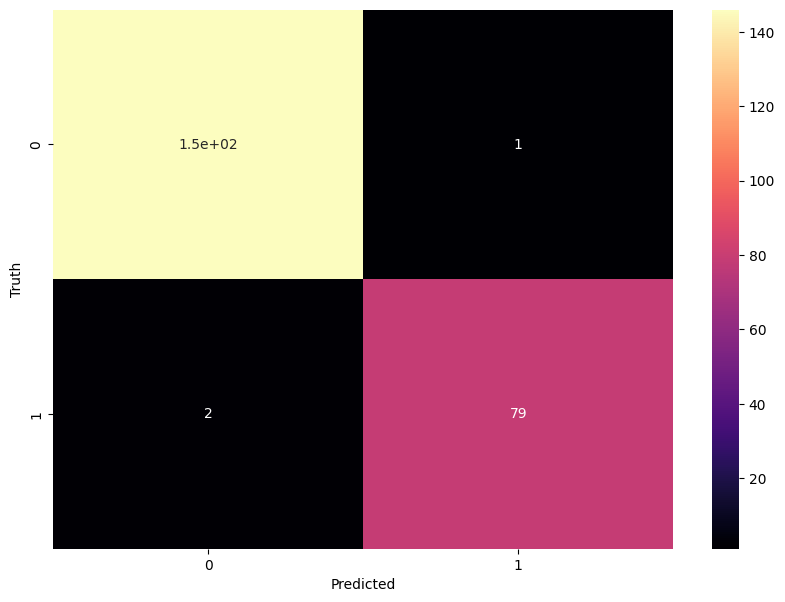


Model = LabelPropagation()
Accuracy score: 0.9868421052631579
Precision score: 0.9875
Recall score: 0.9753086419753086
F1 score: 0.9813664596273292
Validation score: 0.9473684210526315


/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


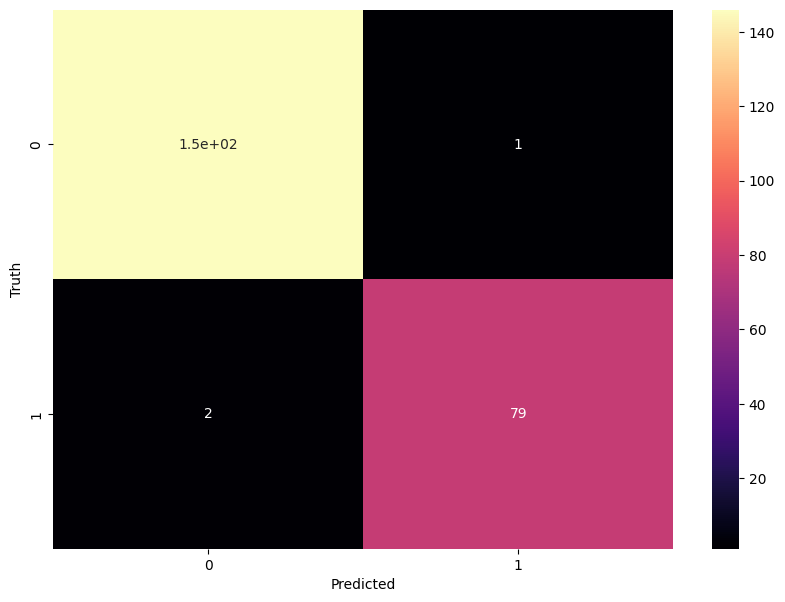


Model = LabelSpreading()
Accuracy score: 0.9868421052631579
Precision score: 0.9875
Recall score: 0.9753086419753086
F1 score: 0.9813664596273292
Validation score: 0.9473684210526315


/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


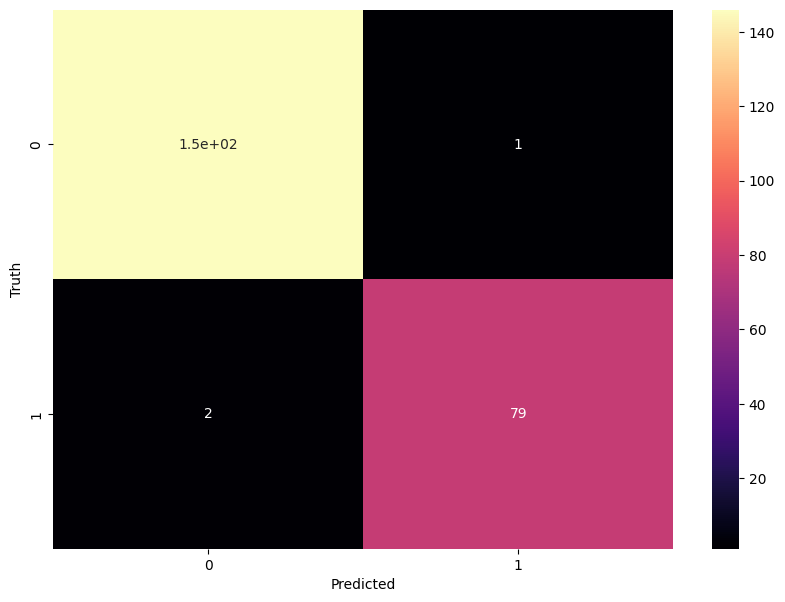


Model = LinearDiscriminantAnalysis()
Accuracy score: 0.9517543859649122
Precision score: 0.9861111111111112
Recall score: 0.8765432098765432
F1 score: 0.9281045751633987
Validation score: 0.9298245614035088


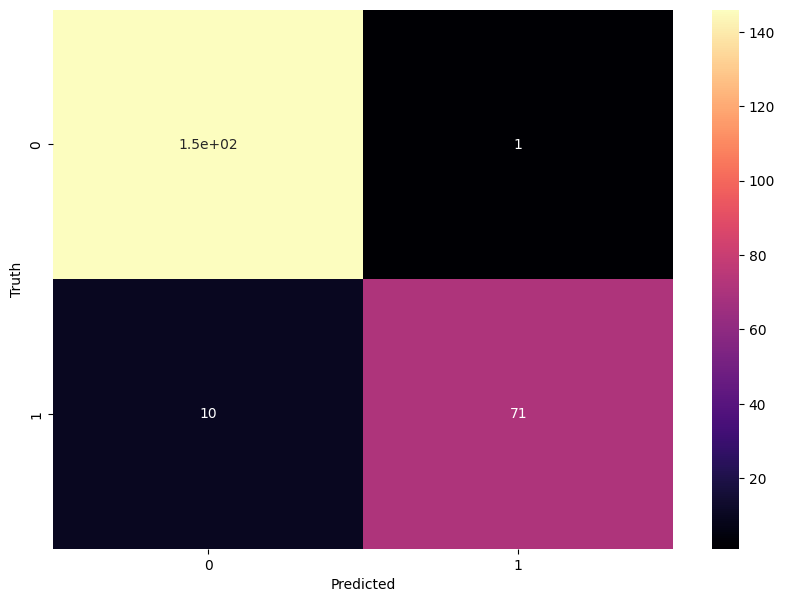


Model = LinearSVC()
Accuracy score: 0.9780701754385965
Precision score: 0.9634146341463414
Recall score: 0.9753086419753086
F1 score: 0.9693251533742332
Validation score: 0.9298245614035088


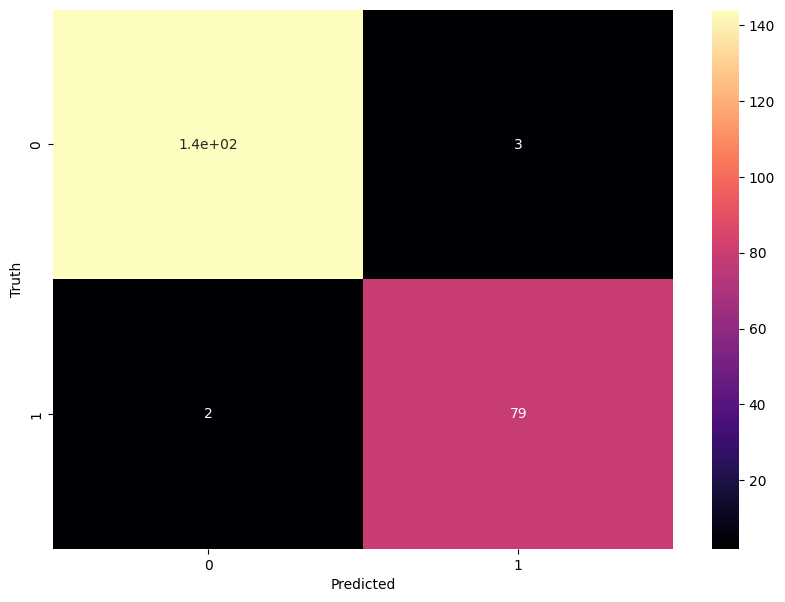


Model = LogisticRegression()
Accuracy score: 0.9868421052631579
Precision score: 0.975609756097561
Recall score: 0.9876543209876543
F1 score: 0.9815950920245398
Validation score: 0.9824561403508771


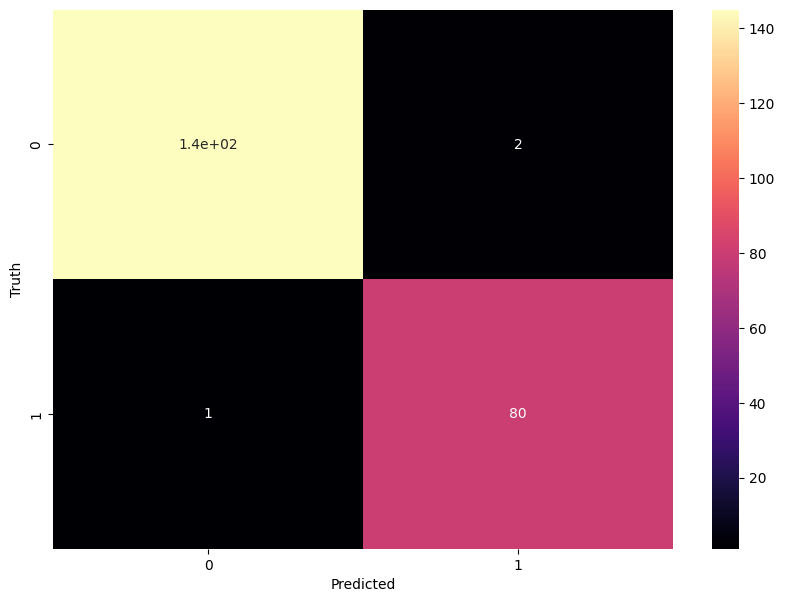

/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Model = LogisticRegressionCV()
Accuracy score: 0.9868421052631579
Precision score: 0.975609756097561
Recall score: 0.9876543209876543
F1 score: 0.9815950920245398
Validation score: 0.9824561403508771


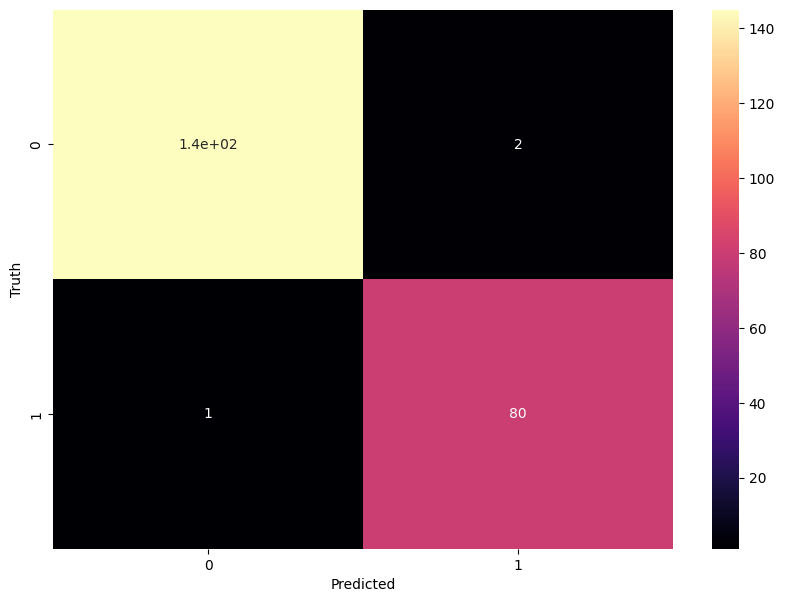

/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model = MLPClassifier()
Accuracy score: 0.9912280701754386
Precision score: 0.9876543209876543
Recall score: 0.9876543209876543
F1 score: 0.9876543209876543
Validation score: 0.9649122807017544


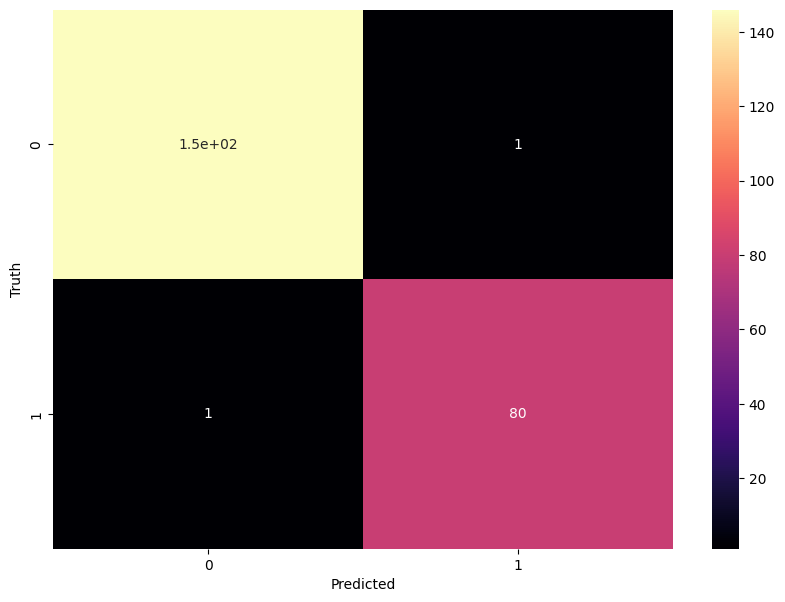


Model = NearestCentroid()
Accuracy score: 0.9254385964912281
Precision score: 0.9210526315789473
Recall score: 0.8641975308641975
F1 score: 0.89171974522293
Validation score: 0.9298245614035088


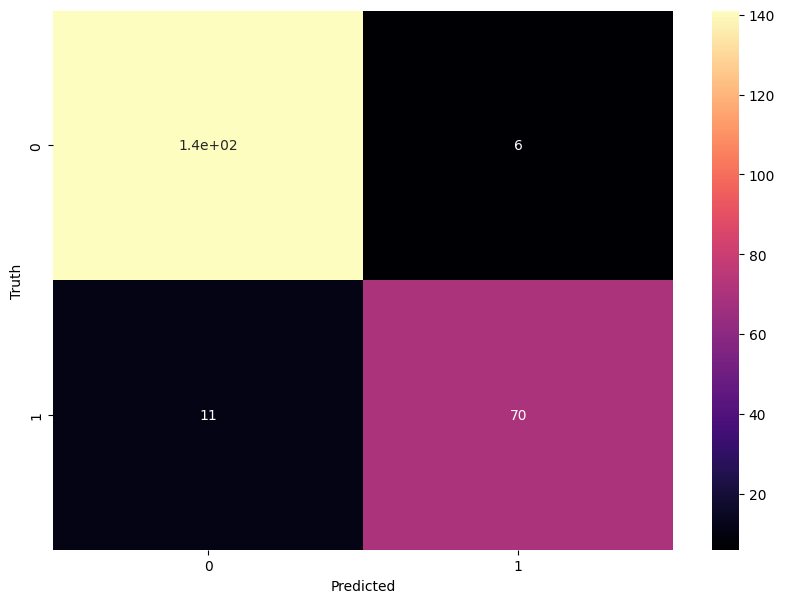


Model = NuSVC()
Accuracy score: 0.9429824561403509
Precision score: 0.9594594594594594
Recall score: 0.8765432098765432
F1 score: 0.9161290322580644
Validation score: 0.9298245614035088


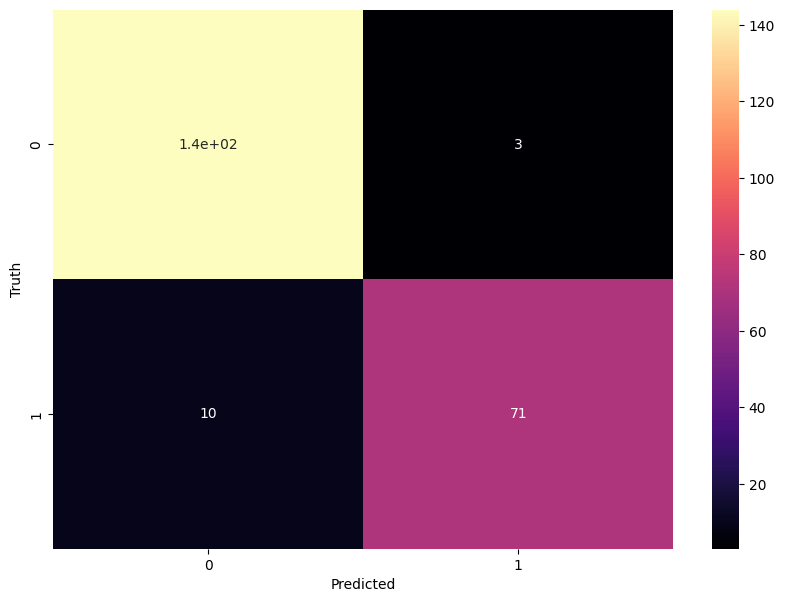


Model = PassiveAggressiveClassifier()
Accuracy score: 0.9342105263157895
Precision score: 0.875
Recall score: 0.9506172839506173
F1 score: 0.9112426035502958
Validation score: 0.8771929824561403


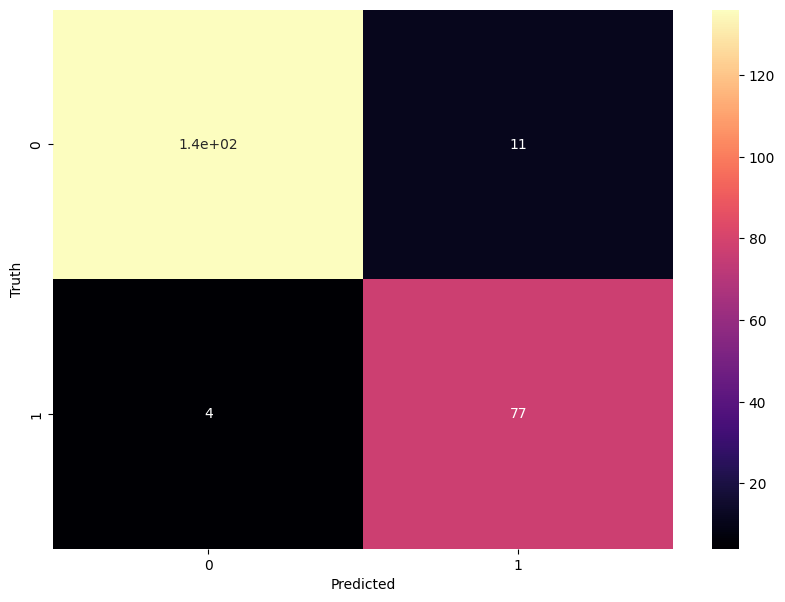


Model = Perceptron()
Accuracy score: 0.9649122807017544
Precision score: 0.9294117647058824
Recall score: 0.9753086419753086
F1 score: 0.9518072289156626
Validation score: 0.9122807017543859


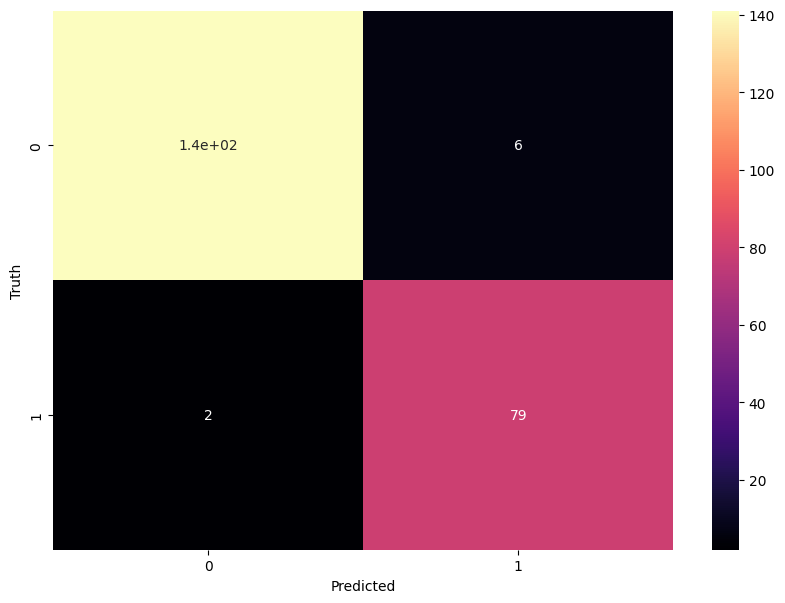


Model = QuadraticDiscriminantAnalysis()
Accuracy score: 0.956140350877193
Precision score: 0.927710843373494
Recall score: 0.9506172839506173
F1 score: 0.9390243902439024
Validation score: 0.9298245614035088


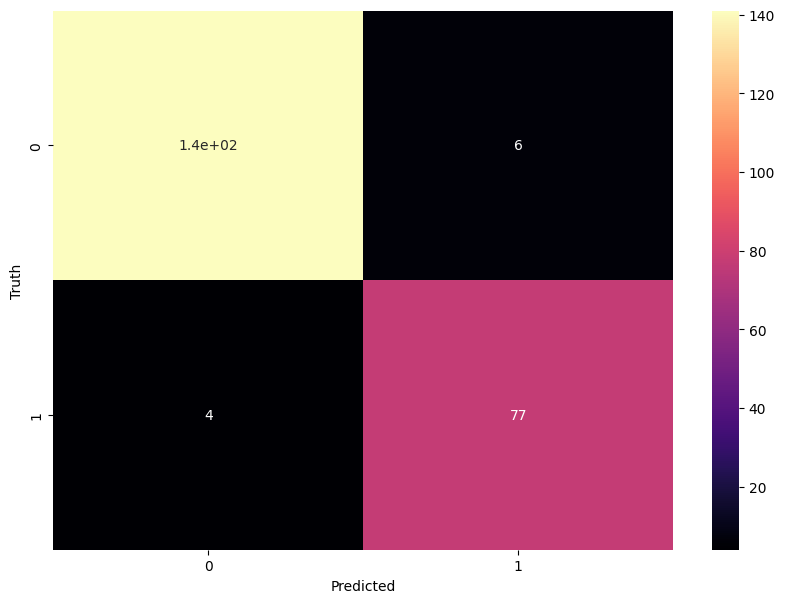


Model = RandomForestClassifier()
Accuracy score: 0.9780701754385965
Precision score: 0.975
Recall score: 0.9629629629629629
F1 score: 0.9689440993788819
Validation score: 0.9122807017543859


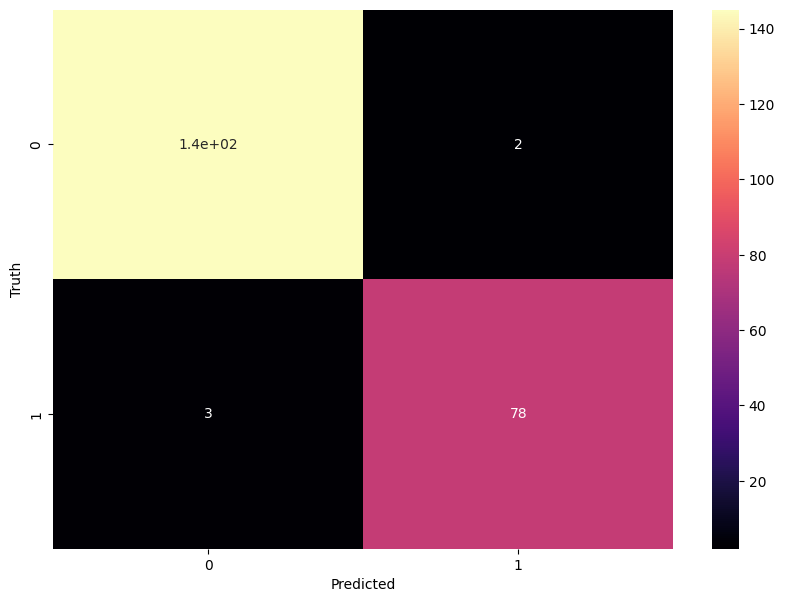


Model = RidgeClassifier()
Accuracy score: 0.956140350877193
Precision score: 0.9863013698630136
Recall score: 0.8888888888888888
F1 score: 0.935064935064935
Validation score: 0.9298245614035088


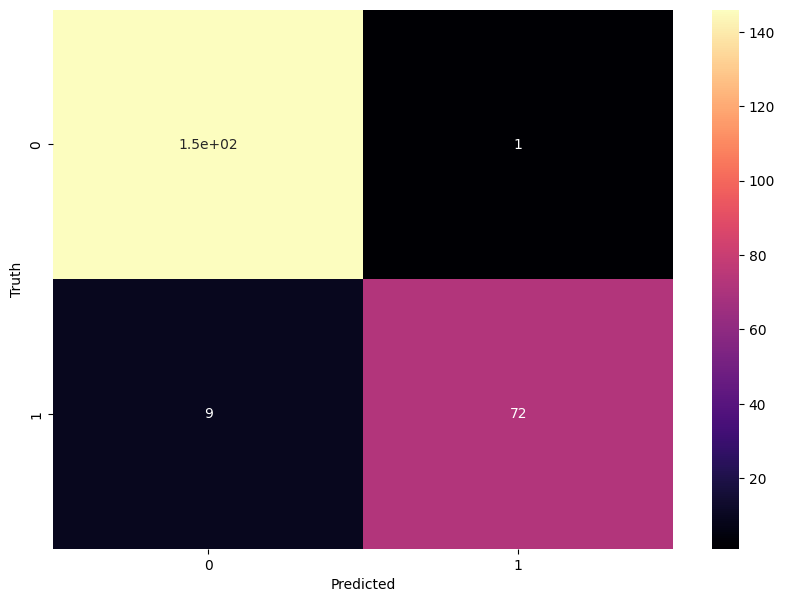


Model = RidgeClassifierCV()
Accuracy score: 0.956140350877193
Precision score: 0.9863013698630136
Recall score: 0.8888888888888888
F1 score: 0.935064935064935
Validation score: 0.9298245614035088


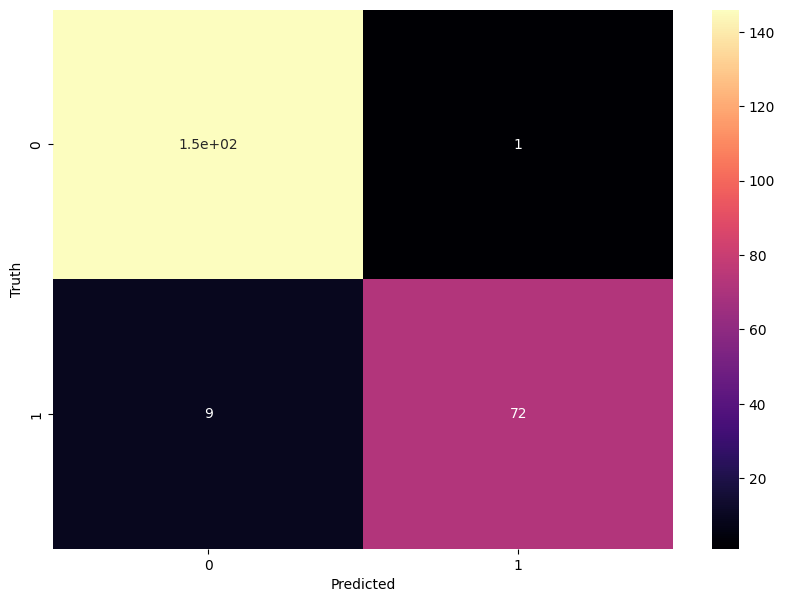


Model = SGDClassifier()
Accuracy score: 0.9605263157894737
Precision score: 0.9285714285714286
Recall score: 0.9629629629629629
F1 score: 0.9454545454545454
Validation score: 0.9122807017543859


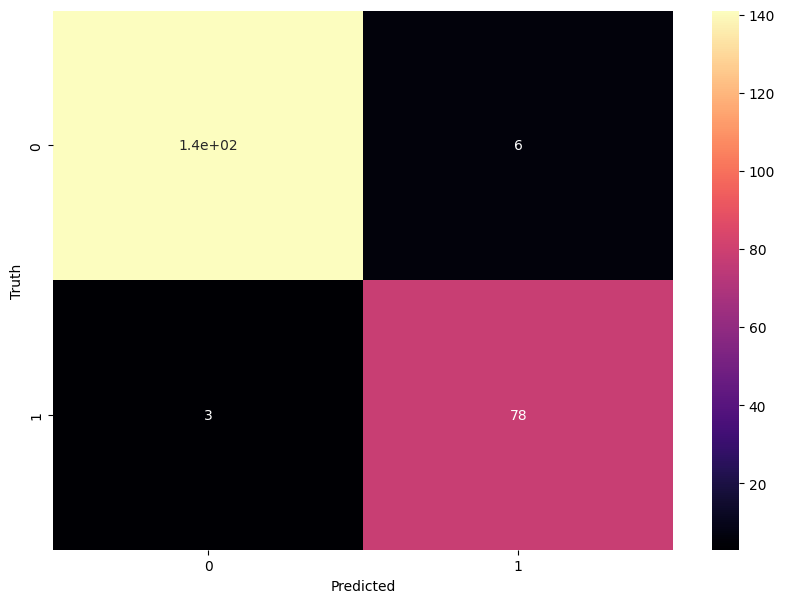


Model = SVC()
Accuracy score: 0.9868421052631579
Precision score: 0.9875
Recall score: 0.9753086419753086
F1 score: 0.9813664596273292
Validation score: 0.9649122807017544


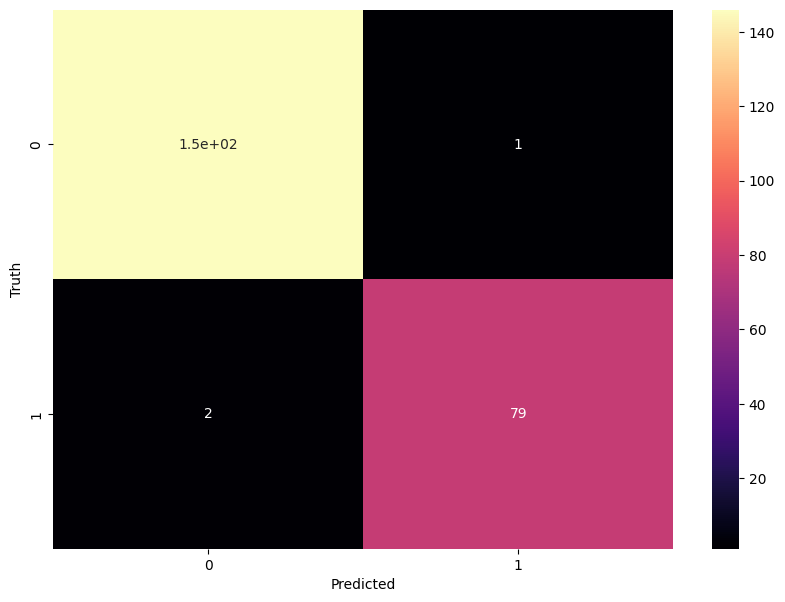

In [13]:
for model in models:
    try:
        run_model(model(), X_train, y_train, X_test, y_test, X_validation, y_validation)
    except:
        pass

2023-06-25 19:43:15.823381: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-25 19:43:15.862245: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 19:43:16.087646: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 19:43:16.089435: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 19:43:17.116665: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Epoch 1/600


2023-06-25 19:43:17.940759: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-25 19:43:17.941320: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


16/16 [==============================] - 1s 11ms/step - loss: 1.0352 - accuracy: 0.4336 - val_loss: 0.8822 - val_accuracy: 0.2105
Epoch 2/600
16/16 [==============================] - 0s 2ms/step - loss: 1.0060 - accuracy: 0.4551 - val_loss: 0.8552 - val_accuracy: 0.2281
Epoch 3/600
16/16 [==============================] - 0s 2ms/step - loss: 0.9982 - accuracy: 0.4355 - val_loss: 0.8298 - val_accuracy: 0.2456
Epoch 4/600
16/16 [==============================] - 0s 2ms/step - loss: 0.9496 - accuracy: 0.4531 - val_loss: 0.8047 - val_accuracy: 0.2632
Epoch 5/600
16/16 [==============================] - 0s 3ms/step - loss: 0.9478 - accuracy: 0.4922 - val_loss: 0.7827 - val_accuracy: 0.3158
Epoch 6/600
16/16 [==============================] - 0s 2ms/step - loss: 0.9534 - accuracy: 0.4668 - val_loss: 0.7618 - val_accuracy: 0.3333
Epoch 7/600
16/16 [==============================] - 0s 2ms/step - loss: 0.8993 - accuracy: 0.4863 - val_loss: 0.7409 - val_accuracy: 0.3860
Epoch 8/600
16/16 [=====

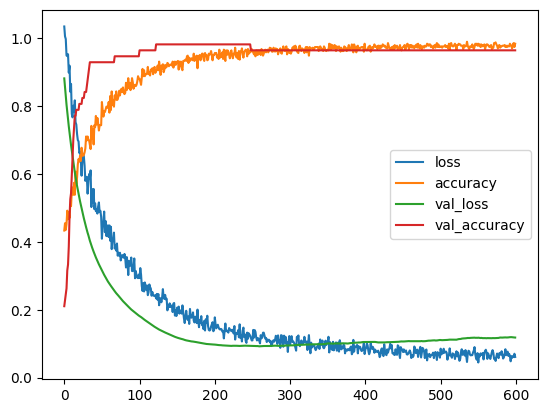

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_validation, y_validation), verbose=1)

losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()